In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn import linear_model as lm

#problem 1
#read the file 
ad = pd.read_csv('Advertising.csv')
#read the first 20 lines of data 
ad.head(20)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [49]:
#problem 2
# standardization of data using equation provided in homwork 
ad['TV_std'] = (ad['TV'] - ad['TV'].mean()) / ad['TV'].std()
# normalization of data using equation provided in homework 
ad['TV_norm'] = (ad['TV'] - ad['TV'].min()) / (ad['TV'].max()- ad['TV'].min())
ad

,Unnamed: 0,TV,radio,newspaper,sales,TV_std,TV_norm
0,1,230.1,37.8,69.2,22.1,0.967425,0.775786
1,2,44.5,39.3,45.1,10.4,-1.194379,0.148123
2,3,17.2,45.9,69.3,9.3,-1.512360,0.055800
3,4,151.5,41.3,58.5,18.5,0.051919,0.509976
4,5,180.8,10.8,58.4,12.9,0.393196,0.609063
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,-1.267759,0.126818
196,197,94.2,4.9,8.1,9.7,-0.615491,0.316199
197,198,177.0,9.3,6.4,12.8,0.348934,0.596212
198,199,283.6,42.0,66.2,25.5,1.590574,0.956713


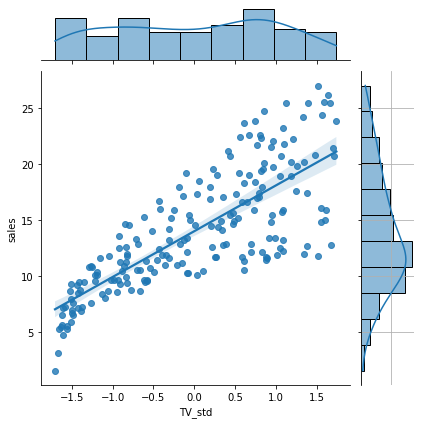

In [50]:
#problem 3
#referenced linreg lab 4
sb.jointplot(data=ad, x='TV_std', y='sales', kind='reg')
#figur = mat.figure(figsize=(5,5))
# was not able to scale smaller 
mat.grid()

In [51]:
#problem 4
# function for mean squared error(mse) 
# takes in response values (values) and model predictions(predictions)
def mse(values, predictions):
    sum = 0
    m = len(predictions)
    # for i in the range of all of the predictions 
    for i in range(m):
        #gets the square of values - predictions 
        sum += (values[i] - predictions[i])**2
    # the mean squared error is the square of values - predicitons devided by the range of all predictions
    mean_squared_error = sum / m
    return mean_squared_error

# function for mean absolute error(mse) 
# takes in response values (values) and model predictions(predictions)
def mae(values, predictions):
    sum = 0
    m = len(predictions)
    # for i in range of all the predictions 
    for i in range(m):
        #gets the absolute value of values - predictions 
        sum += abs(values[i] - predictions[i])
    # the mean absolute error is the absolute value of values - predicitons devided by the range of all predictions
    mean_absolute_error = sum / m
    return mean_absolute_error


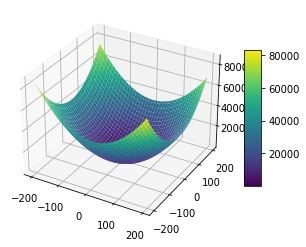

In [52]:
#problem 5
# ypred = b0 + b1x
# four variable taken in b0, b1, ar, function 
def ypred(b0, b1,ar, function):
    ypred = []
    # iterates through values of b0 and b1
    for r in b0:
        temp = []
        for s in b1:
            predictions = []
            #calculates predictions using the equation y = b0 + b1x
            for i in ar:
                predictions.append(r + s*i) 
            # data is applied to sales and predictions
            temp.append(function(ad['sales'], predictions))
        #appends result to ypred
        ypred.append(temp) 

    return np.array(ypred)

b0 = np.arange(-200,200,5)
b1 = np.arange(-200,200,5)

b0_g, b1_g = np.meshgrid(b0, b1)


# mean squared error and TV_std plot plotting a 3D surface plot of b0_g, b1_g and y_mse using the matplotlib library
y_mse = ypred(b0, b1, ad['TV_std'], mse)
#size of map 
figur = mat.figure(figsize=(5,5))
axis = mat.axes(projection='3d') 
surfac = axis.plot_surface(b0_g,b1_g,y_mse, map_diagram = mat.cm.viridis) 
figur.colorbar(surfac, shrink=.5, aspect=10)

# plots the map 
mat.show()

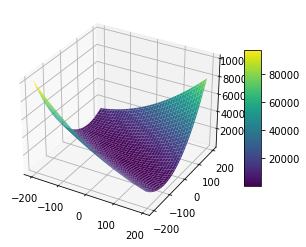

In [53]:
# mean squared error and TV_norm plot plotting a 3D surface plot of b0_g, b1_g and y_mse using the matplotlib library,
y_mse_norm = ypred(b0, b1, ad['TV_norm'], mse)
#size of map 
figur = mat.figure(figsize=(5,5))
#configures map to 3d
axis = mat.axes(projection='3d') 
surfac = axis.plot_surface(b0_g,b1_g,y_mse_norm, map_diagram = mat.cm.viridis) 
figur.colorbar(surfac, shrink=.5, aspect=10)
# plots the map 
mat.show()

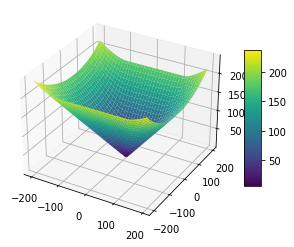

In [54]:
# mean absolute error and TV_std plot 
y_mae = ypred(b0, b1, ad['TV_std'], mae)
#size of map 
figur = mat.figure(figsize=(5,5))
#configures map to 3d
axis = mat.axes(projection='3d') 
surfac = axis.plot_surface(b0_g,b1_g,y_mae, map_diagram = mat.cm.viridis) 
figur.colorbar(surfac, shrink=.5, aspect=10)
# plots the map 
mat.show()

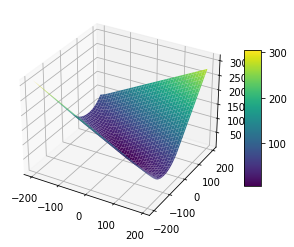

In [55]:
# mean absolute norm and TV_norm plot 
y_mae_norm = ypred(b0, b1, ad['TV_norm'], mae)
#size of map 
figur = mat.figure(figsize=(5,5))
#configures map to 3d
axis = mat.axes(projection='3d') 
surfac = axis.plot_surface(b0_g,b1_g,y_mae_norm, map_diagram = mat.cm.viridis) 
figur.colorbar(surfac, shrink=.5, aspect=10)
# plots the map 
mat.show()

In [56]:
# Problem 6
arr_b0 = []
arr_b1 = []
# random search takes three inputs 
def rand_search(X, y, k=1000):
    # b0 and b1 defined within the range of -200 and 200 
    b0 = np.random.uniform(-200, 200)
    b1 = np.random.uniform(-200, 200)
    # calcualtes the mean squared error 
    mse = ((y - (b0 + b1*X))**2).mean()
    # generates b0 and b1 k times and calcualtes the mse
    for i in range(k):
        b01 = b0 + np.random.uniform(-1, 1)
        b11 = b1 + np.random.uniform(-1, 1)
        mse1 = ((y - (b01 + b11*X))**2).mean()
        arr_b0.append(b01)
        arr_b1.append(b11)
        # compares the new mean squared error with the previous on
        #if new mse is smaller then b0 and b1 is updates 
        if mse1 < mse:
            b0, b1, mse = b01, b11, mse1
    return b0, b1
b0, b1 = rand_search(ad['TV_std'], ad['sales'])
print("The b0 is :", b0)
print("The b1 is :", b1)

b0: 14.01813952848587
b1: 4.104104663469379


In [57]:
#Problem 7
arr_b0_des = []
arr_b1_des = []
# random search takes three inputs 
def grad_des(X, y, learn=0.01, k=1000):
    # b0 and b1 defined within the range of -200 and 200 
    b0 = np.random.uniform(-200, 200)
    b1 = np.random.uniform(-200, 200)
    # computes the predicted y values using the current coefficients and then 
    # updates the coefficients using gradient descent algorithm
    for i in range(k):
        ypred = b0 + b1*X
        b0 = b0 - learn * ((-2 / len(X)) * sum(y - ypred))
        b1 = b1 - learn * ((-2 / len(X)) * sum(X * (y - ypred)))
        arr_b0_des.append(b0)
        arr_b1_des.append(b1)
    return b0,b1
b0, b1 = grad_des(ad['TV_std'], ad['sales'])
print(" The b0 is :", b0)
print(" The b1 is :", b1)

b0: 14.022500012570722
b1: 4.081222314239718


In [58]:
#Problem 8 
# referenced lab 4
# unsure why had to array.reshape but when ran error message stated 
X = ad['TV_std'].array.reshape(-1, 1)
y = ad['sales'].array.reshape(-1, 1)
re = lm.LinearRegression()
re.fit(X, y)
y_intercept = re.intercept_
coef = re.coef_
print("The slope is: ", coef)
print("The y-intercept is: ", y_intercept)

Slope:  [[4.08122196]]
Y-Intercept:  [14.0225]


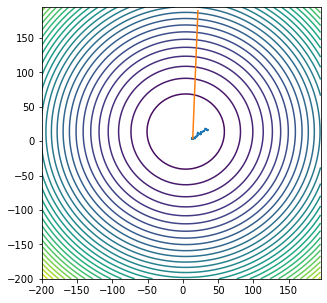

In [59]:
#Problem 9
mat.figure(figsize=(5,5)) 
# contour plot of b0_g, b1_g and y_mse
cp = mat.contour(b0_g,b1_g,y_mse, 30) 
# plots sequence of b0 and b1 values from gradient descent algorithm 
mat.plot(arr_b0,arr_b1)
mat.plot(arr_b0_des,arr_b1_des)
# plots map 
mat.show()